In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
df_train=pd.read_csv("../DSML25/train.csv")
df_test=pd.read_csv("../DSML25/test.csv")

In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_train.groupby('Pclass').mean()['Survived']

C:\Users\HP\AppData\Local\Temp\ipykernel_16040\2392273178.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby('Pclass').mean()['Survived']


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Pclass', ylabel='count'>

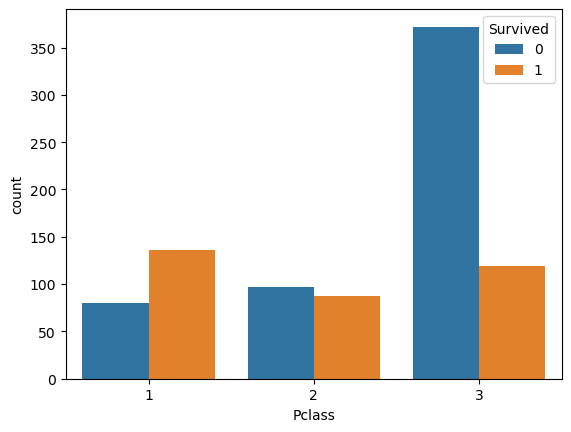

In [11]:
#sb.countplot(df_train['Pclass'], hue=df_train['Survived'])
sb.countplot(data=df_train,x='Pclass',hue='Survived')

In [12]:
df_train.groupby('Sex').mean()['Survived']

C:\Users\HP\AppData\Local\Temp\ipykernel_16040\155049872.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby('Sex').mean()['Survived']


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [13]:
df_train.groupby('Embarked').mean()['Survived']

C:\Users\HP\AppData\Local\Temp\ipykernel_16040\1968952980.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby('Embarked').mean()['Survived']


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

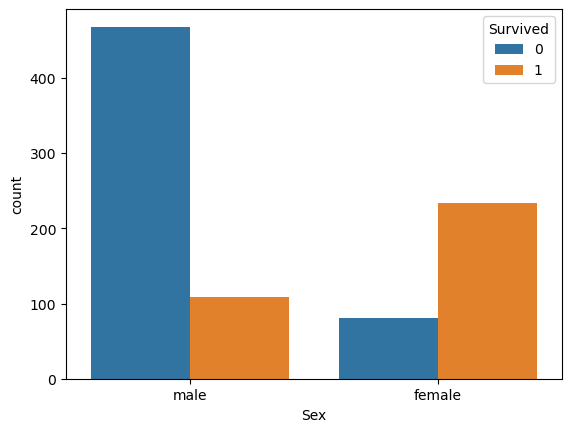

In [14]:
sb.countplot(data=df_train,x='Sex',hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

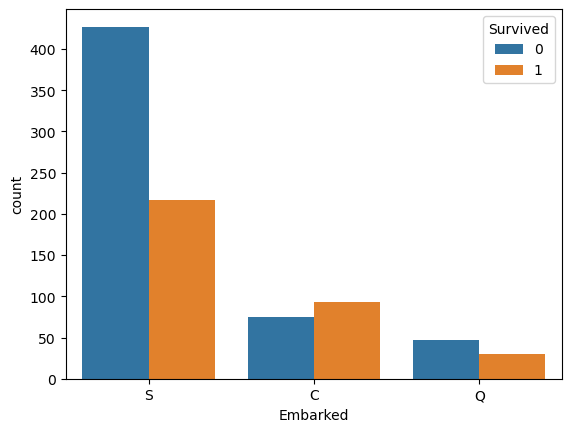

In [15]:
sb.countplot(data=df_train,x='Embarked',hue='Survived')

In [16]:
df_train['iscabin']=(~df_train['Cabin'].isna()).apply(int)

In [17]:
df_train.groupby('iscabin').mean()['Survived']

C:\Users\HP\AppData\Local\Temp\ipykernel_16040\3393841632.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby('iscabin').mean()['Survived']


iscabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [18]:
#age binning
df_train['Age_cat']=df_train['Age'].apply(lambda age:'child' if age<=18 else 'young' if age<50 else 'old')

<Axes: xlabel='Age_cat', ylabel='count'>

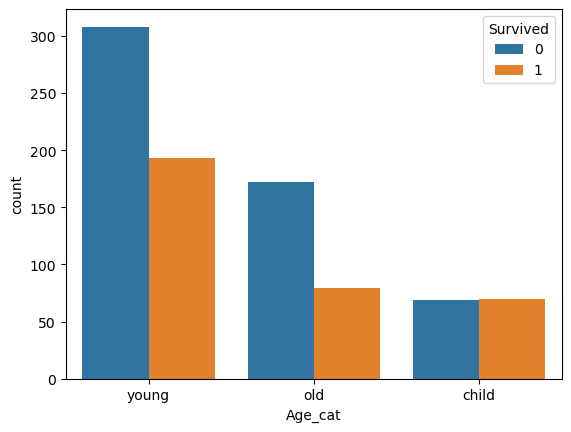

In [19]:
sb.countplot(data=df_train,x='Age_cat',hue='Survived')

In [20]:
df_train.groupby('Pclass').max()['Fare']

C:\Users\HP\AppData\Local\Temp\ipykernel_16040\2283214041.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_train.groupby('Pclass').max()['Fare']


Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [21]:
df_train['fare_corr']=df_train['Fare'].apply(lambda fare:'fare<69' if fare<=69 else 'fare>69 and <=73' if (fare>69 and fare<=73) else 'fare>73')

<Axes: xlabel='fare_corr', ylabel='count'>

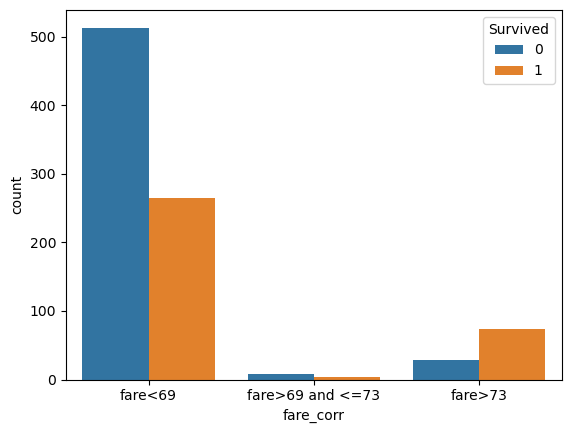

In [22]:
sb.countplot(data=df_train,x='fare_corr',hue='Survived')


In [23]:
df_train.groupby('fare_corr').mean()['Survived']

C:\Users\HP\AppData\Local\Temp\ipykernel_16040\1960588399.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby('fare_corr').mean()['Survived']


fare_corr
fare<69             0.339768
fare>69 and <=73    0.333333
fare>73             0.725490
Name: Survived, dtype: float64